# Data

In the table is the average consumption of 17 types of food in grams per person per week for every country in the UK.

The table shows some interesting variations across different food types, but overall differences aren't so notable.

<b> Reading the data.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_1 = pd.read_csv('C:\\Users\\Ashutosh\\Desktop\\TF_2_Notebooks_and_Data\\DATA\\UK_foods.csv')

In [3]:
df_1.head()

,Unnamed: 0,England,Wales,Scotland,N.Ireland
0,Cheese,105,103,103,66
1,Carcass_meat,245,227,242,267
2,Other_meat,685,803,750,586
3,Fish,147,160,122,93
4,Fats_and_oils,193,235,184,209


In [4]:
df = pd.read_csv('C:\\Users\\Ashutosh\\Desktop\\TF_2_Notebooks_and_Data\\DATA\\UK_foods.csv',index_col='Unnamed: 0')

In [5]:
df.head()

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Cheese to Confectionery 
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   England    17 non-null     int64
 1   Wales      17 non-null     int64
 2   Scotland   17 non-null     int64
 3   N.Ireland  17 non-null     int64
dtypes: int64(4)
memory usage: 680.0+ bytes


In [7]:
df.T

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


<b> Creating a heatmap from df to see if any different then other.

<AxesSubplot:>

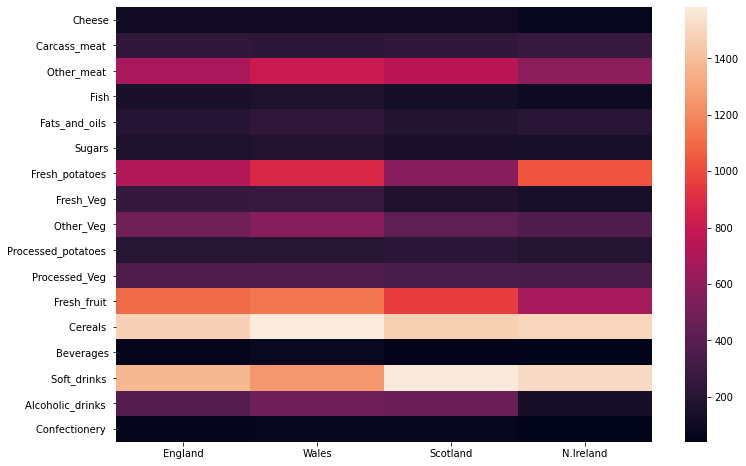

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(df)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

<b> Build an encoder to reduce the no of dimesions in dataset.

In [10]:
encoder = Sequential()

encoder.add(Dense(units=8,activation='relu',input_shape=[17]))
encoder.add(Dense(units=4,activation='relu',input_shape=[8]))
encoder.add(Dense(units=2,activation='relu',input_shape=[4]))

<b> Also,decoder to get back to original dimensions.

In [11]:
decoder = Sequential()

decoder.add(Dense(units=4,activation='relu',input_shape=[2]))
decoder.add(Dense(units=8,activation='relu',input_shape=[4]))
decoder.add(Dense(units=17,activation='relu',input_shape=[8]))

<b> Combining encoder and decoder to be an autoencoder.

In [12]:
autoencoder =  Sequential([encoder,decoder])

autoencoder.compile(loss="mse" ,optimizer=SGD(lr=1.5))

c:\users\ashutosh\appdata\local\programs\python\python39\lib\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


<b> Scaling the data.

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler = MinMaxScaler()

In [15]:
scaled_df = scaler.fit_transform(df.transpose().values)

In [16]:
scaled_df

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [17]:
autoencoder.fit(scaled_df,scaled_df,epochs=15)

Epoch 1/15
1/1 [==============================] - 0s 426ms/step - loss: 0.4275
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.4275
Epoch 3/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 4/15
1/1 [==============================] - 0s 5ms/step - loss: 0.4275
Epoch 5/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 6/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 7/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 8/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 9/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.4275
Epoch 11/15
1/1 [==============================] - 0s 7ms/step - loss: 0.4275
Epoch 12/15
1/1 [==============================] - 0s 8ms/step - loss: 0.4275
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 

<b> Run scaled data through only the encoder and predict the reduced dimensionalty output. 

In [18]:
encoded_2dim = encoder.predict(scaled_df)

In [19]:
encoded_2dim

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]], dtype=float32)

<b>Join the encoded 2 dimensional data with the original countries index.

In [20]:
df.transpose().index

Index(['England', 'Wales', 'Scotland', 'N.Ireland'], dtype='object')

In [21]:
results = pd.DataFrame(data=encoded_2dim,index=df.transpose().index,
                      columns=['C1','C2'])

In [22]:
results = results.reset_index()

In [23]:
results

,index,C1,C2
0,England,0.0,0.0
1,Wales,0.0,0.0
2,Scotland,0.0,0.0
3,N.Ireland,0.0,0.0


<AxesSubplot:xlabel='C1', ylabel='C2'>

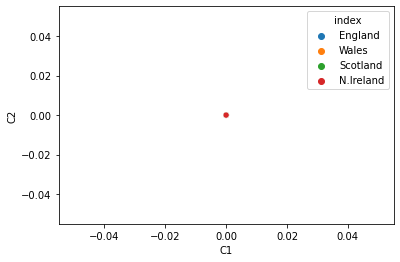

In [24]:
sns.scatterplot(x='C1',y='C2',data=results,hue='index')